<a href="https://colab.research.google.com/github/sijuswamy/AIML_Files/blob/main/Logistic_Regression_Binary_classification_(Using_Pandas).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Context:

## Context

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Content

The datasets consists of several medical predictor variables and one target variable, label. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

>Acknowledgements

>Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

## Inspiration

Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

## Problem Statement

Classify patients to two classes- having diabetics and having no diabetics based on given numerical featurs.

## Data loading



In [ ]:
#import pandas
import pandas as pd
import numpy as np
# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
df = pd.read_csv("https://raw.githubusercontent.com/sijuswamy/A-modern-approach-to-Research/main/diabetesN.csv",names=col_names)

In [ ]:
df.to_csv("pima_data_set.csv")

In [ ]:
d1=pd.read_csv("pima_data_set.csv",index_col=0)
d1.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Have a look at the data frame


## Understanding the Featurs

In [ ]:
df.head()


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


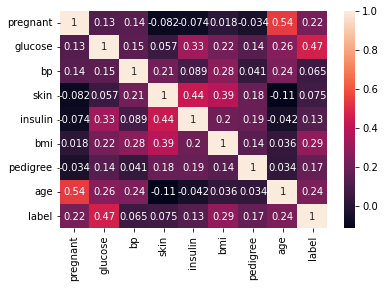

In [ ]:
sns.heatmap(df.corr(),annot=True)

Text(0.5, 1.0, 'Diabetes Patient')

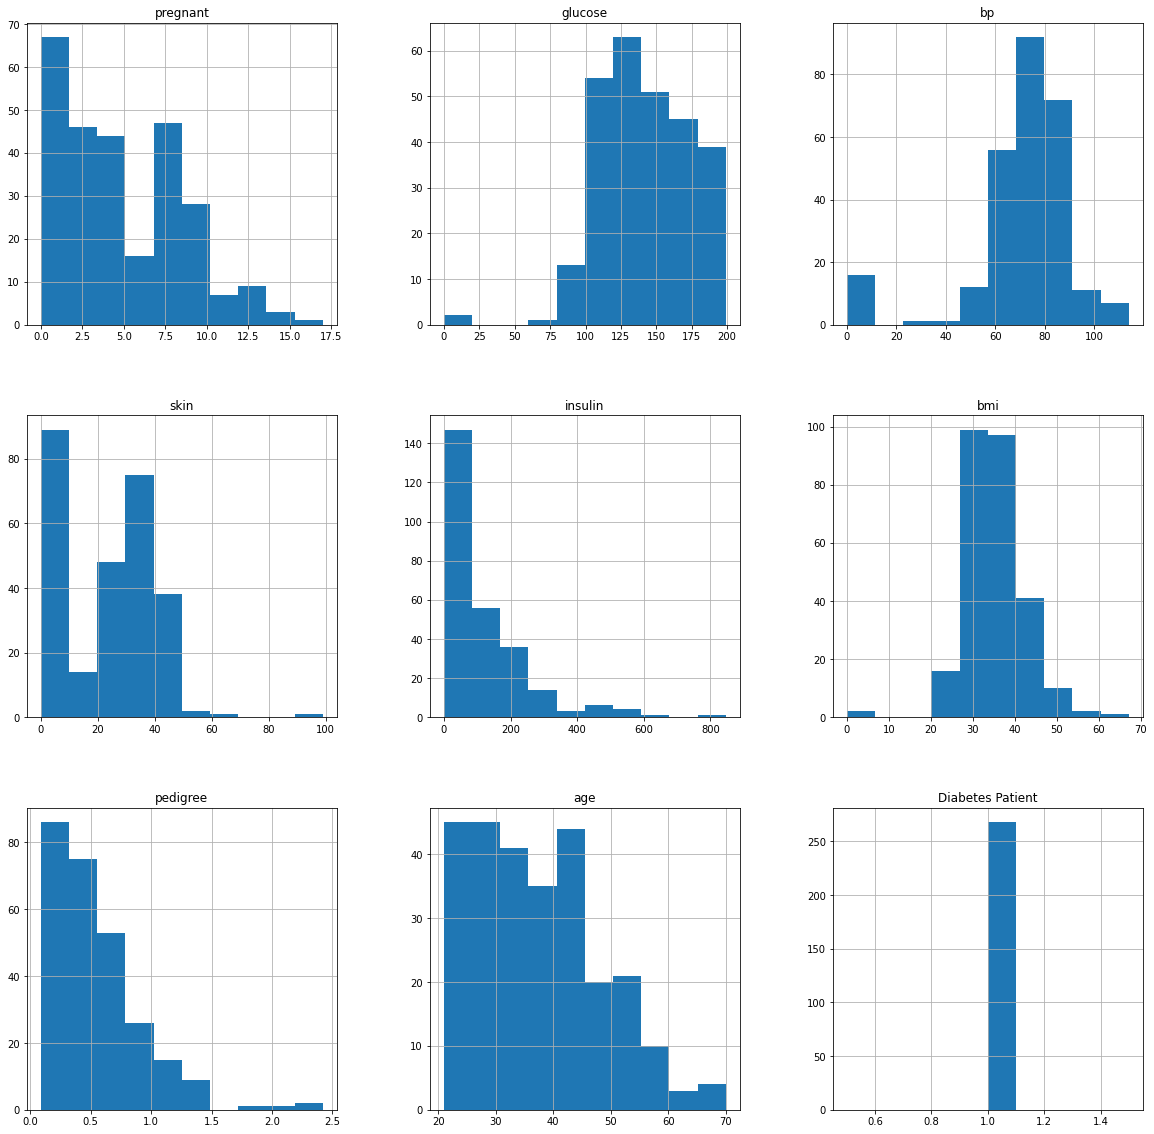

In [ ]:
p = df[df['label']==1].hist(figsize = (20,20))
plt.title('Diabetes Patient')

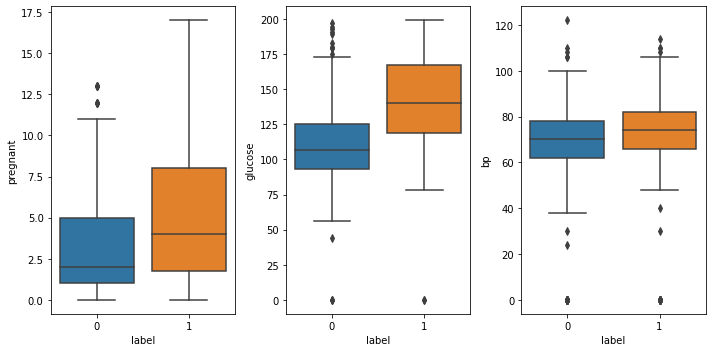

In [ ]:
# Visualize relationship between promoted and other features
fig= plt.figure(figsize=(10,5) )
fig.add_subplot(1,3,1)
ar_6=sns.boxplot(x=df["label"],y=df["pregnant"])
fig.add_subplot(1,3,2)
ar_6=sns.boxplot(x=df["label"],y=df["glucose"])
fig.add_subplot(1,3,3)
ar_6=sns.boxplot(x=df["label"],y=df["bp"])
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree',
       'age', 'label'],
      dtype='object')

##  Feature Selection

First divide the given columns ( features ) into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [ ]:
print(df['pregnant'].unique())

[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]


In [ ]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = df[feature_cols] # Features
y = df.label # Target variable
# print(X)

## Splitting Data into train and test group

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size. Additionally, you can use random_state to ensure reproducible reaearch.

In [ ]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

## Checking data balance

In [ ]:
#check for distribution of labels
y_train.value_counts(normalize=True)

0    0.642361
1    0.357639
Name: label, dtype: float64

## Model building and Training

First, import the Logistic Regression module and create a Logistic Regression classifier object using LogisticRegression() function.

Then, fit your model on the train set using fit() and perform prediction on the test set using predict().

In [ ]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
#logreg = LogisticRegression(solver='newton-cg',class_weight={0:0.4,1:0.7})
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



## Model Evaluation

In classification models, model evaluation will be done using accuracy measures. The following sessions will explain this evaluation methods.

## Confusion Matrix

A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [ ]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[117,  13],
       [ 24,  38]])

## Interpertations

The dimension of this matrix is 2 X 2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 119 and 36 are actual predictions, and 26 and 11 are incorrect predictions ( mis classifications).


## Visualizing Confusion Matrix

Text(0.5, 257.44, 'Predicted label')

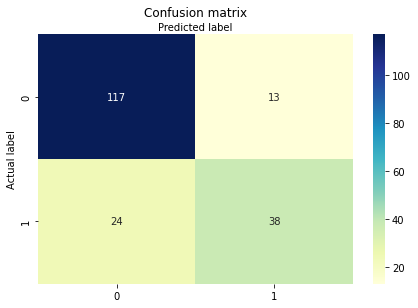

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Model Evaluation Metrics

To evaluate performance or our model we will be using “f1 score” as this is a class imbalance problem using accuracy as a performance metrics is not good also, we can say that f1 score is the go-to metric when we have a class imbalance problem. The formula for calculating the F1 score is as follows:
Let's evaluate the model using model evaluation metrics such as accuracy, precision, and recall.

>**Precision** is the ratio of accurately predicted positive observations to the total predicted positive observations.
$$Precision=\frac{TP}{TP+FP}$$

>**Recall** is the ratio of accurately predicted positive observations to all observations in actual class – yes.

$$Recall=\frac{TP}{TP+FN}$$

>**Note:** F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8072916666666666
Precision: 0.7450980392156863
Recall: 0.6129032258064516


In [ ]:
from sklearn.metrics import f1_score
print("f1 score for base model is : " , f1_score(y_test,y_pred))

f1 score for base model is :  0.672566371681416


## ROC Curve

Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

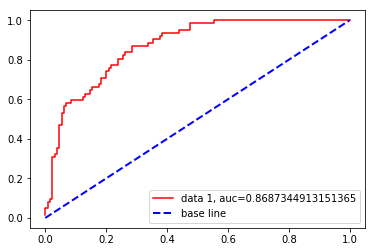

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--', label='base line')
plt.legend(loc=4)
plt.show()

## ALternative way of plotting ROC

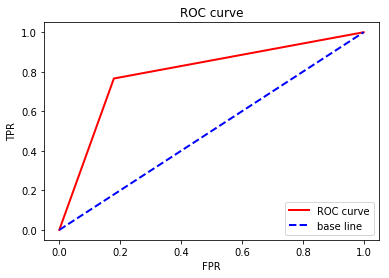

In [ ]:
##Computing false and true positive rates
fpr, tpr,_=metrics.roc_curve(logreg.predict(X_test),y_test,drop_intermediate=False)

import matplotlib.pyplot as plt
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--', label='base line')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend(loc=4)
plt.show()

## Conclusion

AUC score for the case is 0.86. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.

## Hyperparameter Optimization for the Logistic Regression Model

Model parameters (such as weight, bias, and so on) are learned from data, whereas hyperparameters specify how our model should be organized. The process of finding the optimum fit or ideal model architecture is known as hyperparameter tuning. Hyperparameters control the overfitting or underfitting of the model. Hyperparameter tuning can be done using algorithms like Grid Search or Random Search.

We will use Grid Search which is the most basic method of searching optimal values for hyperparameters. To tune hyperparameters, follow the steps below:

- Create a model instance of the Logistic Regression class
- Specify hyperparameters with all possible values
- Define performance evaluation metrics
- Apply cross-validation
- Train the model using the training dataset
- Determine the best values for the hyperparameters given.

We can use the below code to implement hyperparameter tuning in python using the Grid Search method.

In [ ]:
#Hyperparameter tuning
# define model/create instance
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

lr=LogisticRegression(solver='newton-cg')
#tuning weight for minority class then weight for majority class will be 1-weight of minority class
#Setting the range for class weights
weights = np.linspace(0.0,0.99,5)
#specifying all hyperparameters with possible values
param= {'C': [0.1, 0.5, 1,10,15,20], 'penalty': ['l1', 'l2'],"class_weight":[{0:x ,1:1.0 -x} for x in weights]}
# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
#Gridsearch for hyperparam tuning
model= GridSearchCV(estimator= lr,param_grid=param,scoring="f1",cv=folds,return_train_score=True)
#train model to learn relationships between x and y
model.fit(X_train,y_train)

# print best hyperparameters
print("Best F1 score: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best F1 score:  0.6741623325453112
Best hyperparameters:  {'C': 1, 'class_weight': {0: 0.2475, 1: 0.7525}, 'penalty': 'l2'}


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solv

## Build Model using optimal values of Hyperparameters
Let’s use the below code to build our model again.

In [ ]:
#Building Model again with best params
lr2=LogisticRegression(class_weight={0:0.27,1:0.73},C=20,penalty="l2")
lr2.fit(X_train,y_train)